In [1]:
print("hello world")

hello world


In [2]:
pip install yfinance scikit-learn pandas numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.8 MB/s eta 0:00:00 0:00:01
  Created wheel for peewee: filename=peewee-3.17.5-cp311-cp311-macosx_11_0_arm64.whl size=246397 sha256=b1cd134a6ce81211a8f7ae9a9df43baff646e35dc2e5fcfce8420defed56bf20
  Stored in directory: /Users/priyamsingh/Library/Caches/pip/wheels/d2/cb/9c/c300d7bf782e07f1658c306743d5e30af7e4834001e4064a96
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [4]:
# Fetch historical stock data for a specific ticker (e.g., AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Display the first few rows of the data
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461975  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473150  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370186  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400681  447610800


In [5]:
# Use 'Close' price for prediction
data = data[['Close']]
data = data.dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create a dataframe for the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close'])

In [11]:
# Define the lookback period
lookback = 30

# Create the feature set (X) and the target variable (y)
X, y = [], []
for i in range(lookback, len(scaled_data_df)):
    X.append(scaled_data_df.iloc[i-lookback:i, 0])
    y.append(scaled_data_df.iloc[i, 0])

# Convert X and y to numpy arrays
X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values to get the real stock prices
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

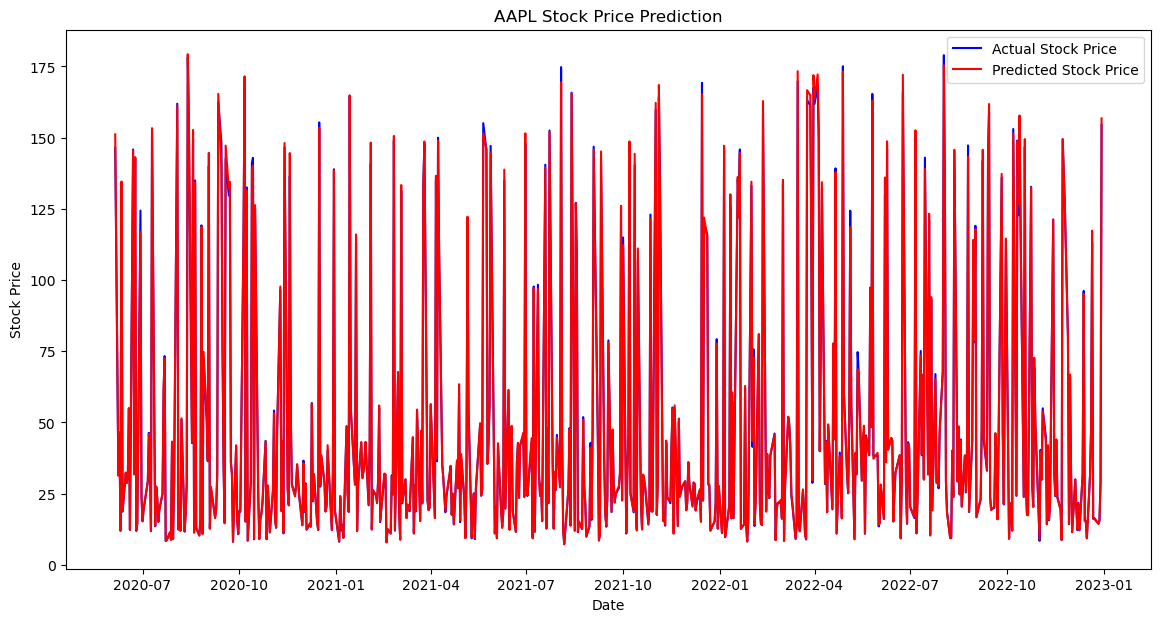

In [9]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(data.index[-len(y_test):], predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
# Get ticker information
apple = yf.Ticker('AAPL')

# Get historical market data
hist = apple.history(period="1mo")
print(hist)

# Show actions (dividends, splits)
actions = apple.actions
print(actions)

# Show dividends
dividends = apple.dividends
print(dividends)

# Show stock splits
splits = apple.splits
print(splits)

# Show financials
financials = apple.financials
print(financials)

# Show major holders
holders = apple.major_holders
print(holders)

                                 Open        High         Low       Close  \
Date                                                                        
2024-04-23 00:00:00-04:00  165.126031  166.823726  164.696606  166.673920   
2024-04-24 00:00:00-04:00  166.314410  169.070681  165.984870  168.791061   
2024-04-25 00:00:00-04:00  169.300369  170.378908  167.922233  169.659882   
2024-04-26 00:00:00-04:00  169.649895  171.107909  168.950831  169.070679   
2024-04-29 00:00:00-04:00  173.135155  175.791556  172.865532  173.264984   
2024-04-30 00:00:00-04:00  173.095225  174.752981  169.769734  170.099289   
2024-05-01 00:00:00-04:00  169.350298  172.476063  168.880934  169.070679   
2024-05-02 00:00:00-04:00  172.276324  173.185095  170.658523  172.795624   
2024-05-03 00:00:00-04:00  186.397167  186.746699  182.412581  183.131607   
2024-05-06 00:00:00-04:00  182.103015  183.950500  180.175621  181.463882   
2024-05-07 00:00:00-04:00  183.201504  184.649537  181.074400  182.152924   

Breakdown                          Value
insidersPercentHeld              0.05220
institutionsPercentHeld          0.57555
institutionsFloatPercentHeld     0.60724
institutionsCount             6309.00000
